# Testing and Validation
- A network with many neurons can easily memorize a dataset, but too many neurons makes it unable to generalize to data it has not seen before
- This is called **overfitting**, where the NN memorizes the training data but it doesn't actually learn the patterns
- Ex) a NN to make boundary between red and blue points. Left makes a good generalization even though some are incorrect, while the right predicts everything correctly but is overfit

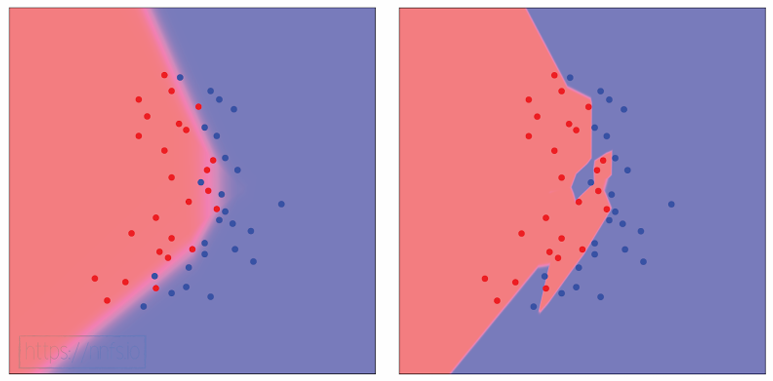

- A dataset should be split into **training data** and **testing data**, where the test data is used to test performance after training the NN parameters
- Make sure the training data and testing data are different enough to prove the NN is able to generalize
- Ex) sensor data with millions of observations at time from 0 to 60 seconds. If a random sample of those observations are taken for traning and the other for testing, the testing dataset won't be much different from training, causing overfitting to spill into the testing data. A better approach would be to split the data into blocks of time, ex) first 30 seconds for training, last 30 seconds for testing
- Test the data by running a single forward pass with the new data

- Evidence of overfitting is if the training loss and test loss differ by over 10%. Ideally the loss should remain the same
- Overfitting may result if the learning rate is too high, too many training epochs, or too large network
- Avoid overfitting by selecting hyperparameters to make the smallest model possible that is still able to learn. Too small model won't learn, too large model will learn too well and overfit

## Validation Data
- If we are trying to tune hyperparameters like learning rate, we should NOT do it on the test data. The test data should be unseen data and not inform the NN at all
- If hyperparameter tuning is done on the test data then it is at risk of overfitting
- Instead use another set of data called **validation data** 
- Validation is used during training to see how the NN performs on a validation dataset WHILE it trains on the training set. Like at the end of every epoch, run a forward pass with the current NN on the validation data and check the validation loss, to see if the NN is generalizing during runtime or if it is just memorizing the training data
- This helps with hyperparameter tuning because if we see with the current hyperparameters that the training loss is decreasing but the validation loss isn't, we can kill the run early and try again with a new set of hyperparameters

- If we have limited data, there are two options for integrating validation
- First, we can split the training set into a smaller training set and validation set. Then, after the final hyperparameters have been selected that reduces both training and validation loss, run it on the entire training set. Then run on the test set

### K-Fold Cross-Validation
- Second, use a process called **K-fold cross-validation**. Split the training set into a number of $k$ parts, for instance if $k=5$ we have sets A, B, C, D, E
- Train the model on the chunks ABCD and then use E for validation
- Then train the model on chunks ABCE and use D for validation
- Repeat $k$ times until every chunk has been used for validation. Average the validation performance across all k folds to get a more robust estimate of how well the model generalizes

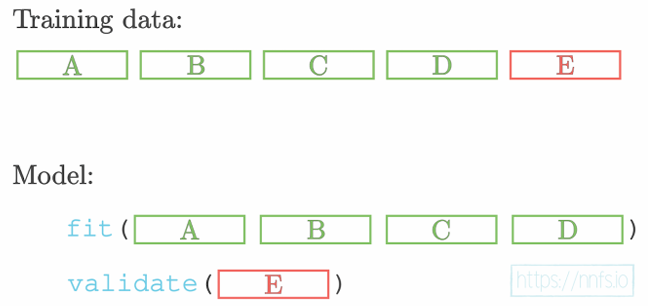

## Training Data
- **Preprocessing** on the training data is often done to scale the data down to a certain range, usually 0 to 1 or -1 to 1
- Depends what activation functions you are using. softmax and sigmoid have output ranges from 0 to 1, but the tanh function has output range from -1 to 1
- Scaling data down also helps prevent overflow, since each pass through a layer is a multiplication which may cause overflow. It is easier to control the training with smaller numbers
- An easy example to get the data from 0 to 1 is to find the maximum absolute value of the training data and dividing the entire dataset by it (divide by the non-absolute value)
- To get data from -1 to 1:

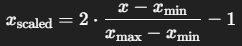

- If we use scaling values for the training data, we need to use the same scaling values for validation and testing. For instance, if we use the maximum absolute val of training to scale the training set, we need to use that for testing, NOT the max abs val of testing. If the resulting scaled values are not within the range 0 to 1 its still ok

- Size of data: preferably few tens of thousands per output class for classification problems